In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [74]:
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [76]:
#independent features
X=df.iloc[:,:-1]
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [122]:
#dependent variable
y = df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [123]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [124]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,18285.0,10409.807383,5998.216236,0.0,5217.0,10422.0,15603.0,20799.0
label,18285.0,0.433361,0.495553,0.0,0.0,0.0,1.0,1.0


In [125]:
df.shape

(18285, 5)

In [126]:
#check the features if categorical
cat_features=[feature for feature in df.columns if df[feature].dtypes == 'O']
#categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('The categorical features are : {}'.format(cat_features))

The categorical features are : ['title', 'author', 'text']


In [127]:
#check for numerical features
numeric_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
print('The numeric features are:  {}'.format(numeric_features))

The numeric features are:  ['id', 'label']


In [128]:
#now will remove the nan values
df=df.dropna()
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [129]:
new_copy=df.copy()
new_copy.shape

(18285, 5)

In [130]:
new_copy.reset_index(inplace=True)

In [131]:
new_copy.tail()

,index,id,title,author,text,label
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
18284,20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [132]:
new_copy['title'][18284]

'What Keeps the F-35 Alive'

In [133]:
%%time
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
corpus=[]
ps=PorterStemmer()
for i in range(0,len(new_copy)):
    review = re.sub('[^a-zA-Z]', ' ', new_copy['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word)  for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

CPU times: user 38.1 s, sys: 1.32 s, total: 39.4 s
Wall time: 39.4 s


In [134]:
#applying count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000, ngram_range=(1, 3))
X=cv.fit_transform(corpus).toarray()

In [135]:
X.shape

(18285, 5000)

In [137]:
y.shape

(18285,)

In [139]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [143]:
cv.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [144]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [148]:
count_df=pd.DataFrame(x_train,columns=cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [150]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [156]:
#Applying MultinomialNB Algorithm
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [157]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [159]:
classifier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [161]:
predict=classifier.predict(x_test)
predict

array([1, 1, 1, ..., 0, 0, 1])

In [162]:
score=accuracy_score(y_test,predict)
score

0.9019055509527755

Confusion matrix, without normalization


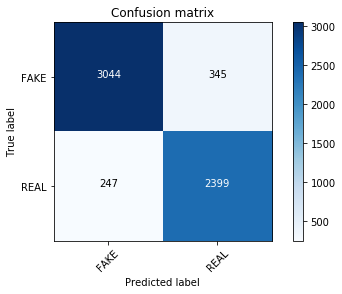

In [164]:
conf_mat = confusion_matrix(y_test, predict)
plot_confusion_matrix(conf_mat, classes=['FAKE', 'REAL'])

In [165]:
classifier.coef_[0]
#the most negative value is the most fakest word

array([ -9.09151179,  -8.62150816,  -9.09151179, ..., -10.7009497 ,
        -8.90919023,  -9.31465534])

In [167]:
feature_names = cv.get_feature_names()

In [174]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:30]
#the most real words

[(-4.011350433181747, 'trump'),
 (-4.2990325056335275, 'hillari'),
 (-4.407530423514232, 'clinton'),
 (-4.91098953146346, 'elect'),
 (-5.187520956195731, 'new'),
 (-5.2456285870030115, 'comment'),
 (-5.284849300156293, 'video'),
 (-5.3976447943016375, 'war'),
 (-5.407644877636221, 'us'),
 (-5.422835043130196, 'hillari clinton'),
 (-5.427950143796966, 'fbi'),
 (-5.491463549519292, 'vote'),
 (-5.576985722957454, 'email'),
 (-5.5889619140041695, 'world'),
 (-5.6447038970124055, 'obama'),
 (-5.745122644759452, 'donald'),
 (-5.773696017203508, 'donald trump'),
 (-5.795674923922284, 'russia'),
 (-5.856762615902122, 'day'),
 (-5.872635965058412, 'america'),
 (-5.913457959578667, 'presid'),
 (-5.913457959578667, 'break'),
 (-5.913457959578667, 'american'),
 (-5.930265077895048, 'say'),
 (-5.991419501048379, 'state'),
 (-6.0858291855194535, 'campaign'),
 (-6.095779516372621, 'wikileak'),
 (-6.095779516372621, 'get'),
 (-6.12623872385733, 'call'),
 (-6.147072810760172, 'investig')]

In [171]:
sorted(zip(classifier.coef_[0], feature_names), reverse=False)[:30]
#Most fakest words

[(-10.700949702360713, 'abe'),
 (-10.700949702360713, 'abroad'),
 (-10.700949702360713, 'abus new'),
 (-10.700949702360713, 'abus new york'),
 (-10.700949702360713, 'act new'),
 (-10.700949702360713, 'act new york'),
 (-10.700949702360713, 'advic'),
 (-10.700949702360713, 'advis new'),
 (-10.700949702360713, 'advis new york'),
 (-10.700949702360713, 'age new'),
 (-10.700949702360713, 'age new york'),
 (-10.700949702360713, 'agenda breitbart'),
 (-10.700949702360713, 'ail'),
 (-10.700949702360713, 'aleppo new'),
 (-10.700949702360713, 'aleppo new york'),
 (-10.700949702360713, 'ali'),
 (-10.700949702360713, 'america breitbart'),
 (-10.700949702360713, 'america new york'),
 (-10.700949702360713, 'american breitbart'),
 (-10.700949702360713, 'american new'),
 (-10.700949702360713, 'american new york'),
 (-10.700949702360713, 'ami'),
 (-10.700949702360713, 'ami schumer'),
 (-10.700949702360713, 'amp'),
 (-10.700949702360713, 'ann'),
 (-10.700949702360713, 'ann coulter'),
 (-10.700949702360